In [65]:
import math
import tqdm
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras

In [82]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [83]:
class_labels = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [84]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [85]:
# Data Preprocessing
def dataNormalization(images, labels):
  # Change image values data type to float32
  images = tf.cast(images, tf.float32)
  # Normalize image values to range between 0 and 1
  images /= 255
  # Return normalized images with labels
  return images, labels

# Apply Normalization to all images in training and test dataset
# map: Function to apply the "dataNormalization" function to each element in the training and test datasets
train_data = train_data.map(dataNormalization)
test_data = test_data.map(dataNormalization)

In [86]:
for image, label in test_data.take(1):
      break

# Get type of the image
type(image)

tensorflow.python.framework.ops.EagerTensor

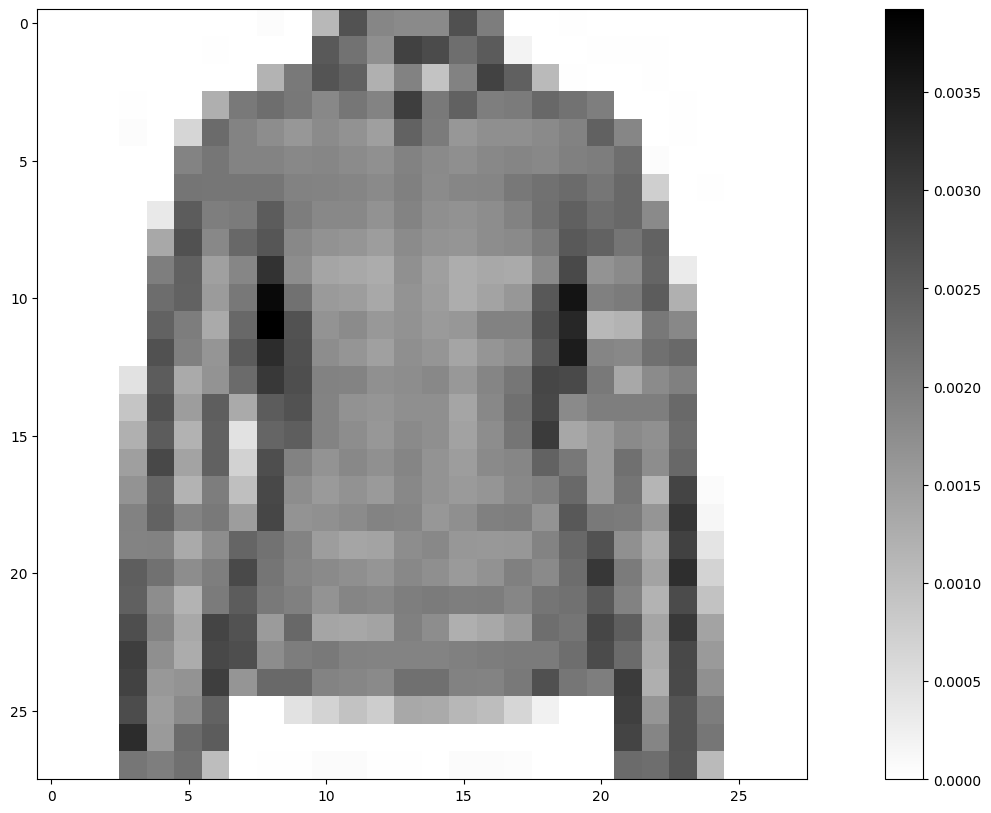

In [87]:
image = image.numpy()
image = image.reshape((28,28))

# Plot the Image
plt.figure(figsize=(20,10))
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)

In [88]:
label = label.numpy()
label

4

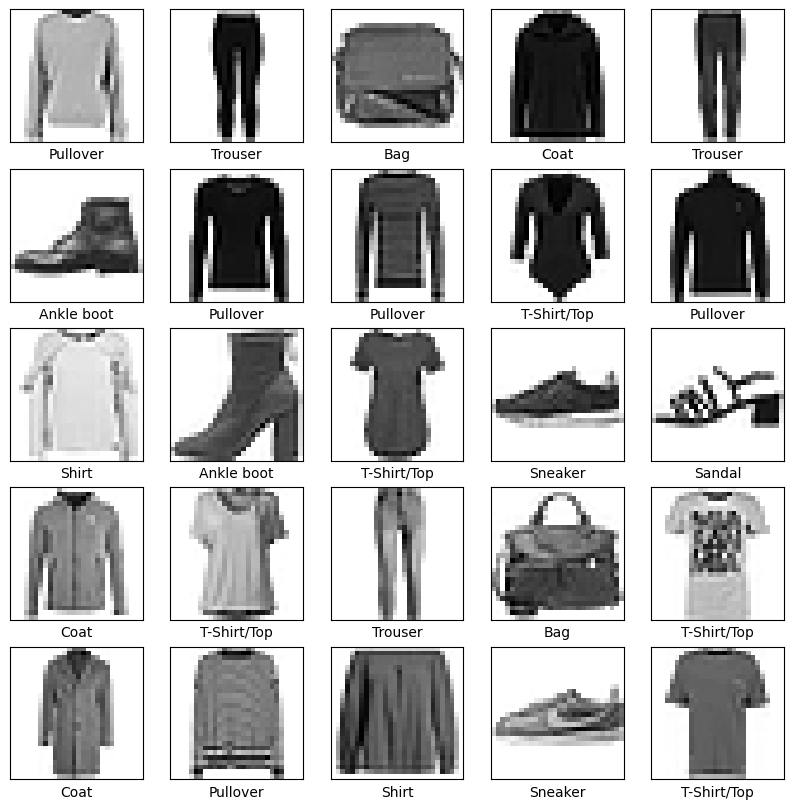

In [89]:
plt.figure(figsize=(10,10))
i = 0

# Access first "n" number of images
for (image, label) in train_data.take(25):
    
    # Convert image tensor to numy and reshape
    image = image.numpy().reshape((28,28))
      
    # Plot images in Grids
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_labels[label])
    i += 1

In [90]:
def Model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), input_shape=x_train.shape[1:], activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(64, (3,3),  activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [91]:
# Compile the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [92]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)      

## Train the Model

In [93]:
model.fit(x_train , y_train , batch_size = 128 , validation_split = 0.1 , epochs=10)

Epoch 1/10
422/422 [==============================] - 30s 69ms/step - loss: 0.3818 - accuracy: 0.8645 - val_loss: 0.7324 - val_accuracy: 0.7223
Epoch 2/10
422/422 [==============================] - 34s 80ms/step - loss: 0.2345 - accuracy: 0.9138 - val_loss: 0.2448 - val_accuracy: 0.9077
Epoch 3/10
422/422 [==============================] - 38s 90ms/step - loss: 0.1882 - accuracy: 0.9308 - val_loss: 0.2450 - val_accuracy: 0.9130
Epoch 4/10
422/422 [==============================] - 40s 94ms/step - loss: 0.1569 - accuracy: 0.9417 - val_loss: 0.2617 - val_accuracy: 0.9022
Epoch 5/10
422/422 [==============================] - 44s 104ms/step - loss: 0.1324 - accuracy: 0.9502 - val_loss: 0.2708 - val_accuracy: 0.9153
Epoch 6/10
422/422 [==============================] - 32s 75ms/step - loss: 0.1123 - accuracy: 0.9573 - val_loss: 0.2947 - val_accuracy: 0.9147
Epoch 7/10
422/422 [==============================] - 30s 71ms/step - loss: 0.0958 - accuracy: 0.9649 - val_loss: 0.2823 - val_accuracy

In [94]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3332 - accuracy: 0.9132


[0.33323222398757935, 0.9132000207901001]

## Evaluate Model Accuracy on Test Dataset

In [97]:
model.save('fashion_mnist.h5')